In [ ]:
# !pip install pandas numpy scikit-learn matplotlib seaborn joblib fastapi uvicorn sqlalchemy alembic python-multipart pydantic
# # optional for quick frontend: streamlit
# !pip install streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 104.7 MB/s eta 0:00:00


In [ ]:
# import pandas as pd
# df = pd.read_csv("/content/CDR-Call-Details.csv", nrows=200)   # only first 200 rows quick peek
# print(df.columns.tolist())


['Phone Number', 'Account Length', 'VMail Message', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls', 'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls', 'Intl Charge', 'CustServ Calls', 'Churn']


In [1]:
import pandas as pd
df = pd.read_csv("/content/CDR-Call-Details.csv")

In [2]:
# Look at the first 5 rows
print(df.head())

  Phone Number  Account Length  VMail Message  Day Mins  Day Calls  \
0     382-4657             128             25     265.1        110   
1     371-7191             107             26     161.6        123   
2     358-1921             137              0     243.4        114   
3     375-9999              84              0     299.4         71   
4     330-6626              75              0     166.7        113   

   Day Charge  Eve Mins  Eve Calls  Eve Charge  Night Mins  Night Calls  \
0       45.07     197.4         99       16.78       244.7           91   
1       27.47     195.5        103       16.62       254.4          103   
2       41.38     121.2        110       10.30       162.6          104   
3       50.90      61.9         88        5.26       196.9           89   
4       28.34     148.3        122       12.61       186.9          121   

   Night Charge  Intl Mins  Intl Calls  Intl Charge  CustServ Calls  Churn  
0         11.01       10.0           3         2.70

In [3]:
# Shape of dataset (rows, columns)
print("Shape:", df.shape)

Shape: (101174, 17)


In [4]:
# Check if any missing values
print(df.isnull().sum())

Phone Number      0
Account Length    0
VMail Message     0
Day Mins          0
Day Calls         0
Day Charge        0
Eve Mins          0
Eve Calls         0
Eve Charge        0
Night Mins        0
Night Calls       0
Night Charge      0
Intl Mins         0
Intl Calls        0
Intl Charge       0
CustServ Calls    0
Churn             0
dtype: int64


In [5]:
# Create total call minutes (local usage)
df["Total_Mins"] = df["Day Mins"] + df["Eve Mins"] + df["Night Mins"]

# Create total number of calls
df["Total_Calls"] = df["Day Calls"] + df["Eve Calls"] + df["Night Calls"]

# Select features we care about
customer_usage = df[[
    "Phone Number", "Total_Mins", "Intl Mins", "Total_Calls", "Intl Calls", "VMail Message"
]]

In [9]:
df["Total_Mins"].head()

,Total_Mins
0,707.2
1,611.5
2,527.2
3,558.2
4,501.9


In [8]:
df["Total_Calls"].head()

,Total_Calls
0,300
1,329
2,328
3,248
4,356


step-**2**

In [11]:
# Summary statistics
print(customer_usage.describe())

          Total_Mins      Intl Mins    Total_Calls     Intl Calls  \
count  101174.000000  101174.000000  101174.000000  101174.000000   
mean     1889.379968      20.291269     796.047730       5.737798   
std      4615.495151      25.033214    1690.906147       8.196367   
min       260.900000       0.000000      72.000000       0.000000   
25%       695.400000       8.800000     361.000000       2.000000   
50%       786.200000      20.200000     512.000000       4.000000   
75%      1340.400000      22.800000     657.000000       8.000000   
max    132444.420000     211.900000   42428.000000     211.000000   

       VMail Message  
count  101174.000000  
mean       18.142645  
std        75.826932  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%        22.000000  
max      1111.000000  


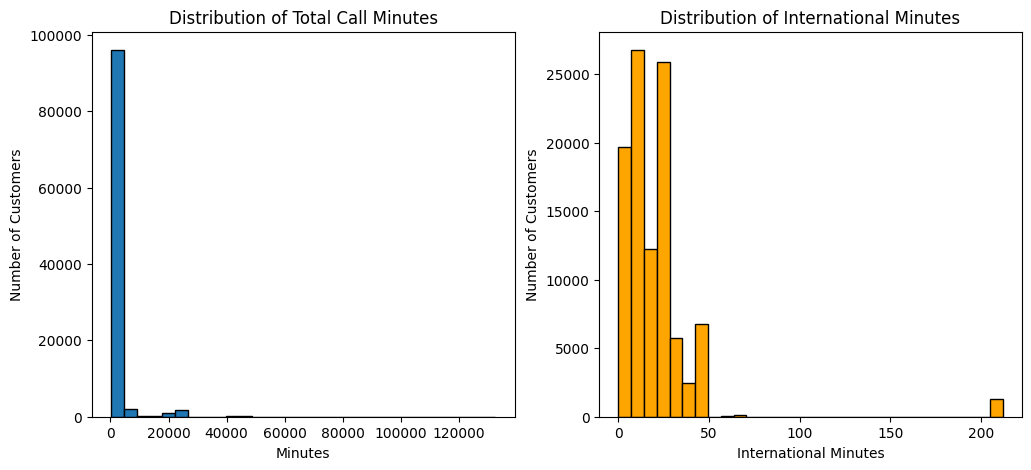

In [13]:
# Visualize distributions

import matplotlib.pyplot as plt

# Plot distributions
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(customer_usage["Total_Mins"], bins=30, edgecolor="black")
plt.title("Distribution of Total Call Minutes")
plt.xlabel("Minutes")
plt.ylabel("Number of Customers")

plt.subplot(1,2,2)
plt.hist(customer_usage["Intl Mins"], bins=30, edgecolor="black", color="orange")
plt.title("Distribution of International Minutes")
plt.xlabel("International Minutes")
plt.ylabel("Number of Customers")

plt.show()


In [14]:
# for total minutes classification
def usage_category(minutes):
    if minutes < 200:
        return "Light User"
    elif minutes < 400:
        return "Medium User"
    else:
        return "Heavy User"

customer_usage["User_Type"] = customer_usage["Total_Mins"].apply(usage_category)

print(customer_usage[["Phone Number", "Total_Mins", "User_Type"]].head())


  Phone Number  Total_Mins   User_Type
0     382-4657       707.2  Heavy User
1     371-7191       611.5  Heavy User
2     358-1921       527.2  Heavy User
3     375-9999       558.2  Heavy User
4     330-6626       501.9  Heavy User


/tmp/ipython-input-1171957727.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_usage["User_Type"] = customer_usage["Total_Mins"].apply(usage_category)


In [19]:
customer_usage['Intl Mins']

,Intl Mins
0,10.0
1,13.7
2,12.2
3,6.6
4,10.1
...,...
101169,6.2
101170,9.8
101171,2.8
101172,2.2


In [20]:
# for international minutes classification
q1 = customer_usage["Intl Mins"].quantile(0.25)
q3 = customer_usage["Intl Mins"].quantile(0.75)

def intl_category(x):
    if x <= q1:
        return "Low Intl"
    elif x <= q3:
        return "Medium Intl"
    else:
        return "High Intl"

customer_usage["Intl_Type"] = customer_usage["Intl Mins"].apply(intl_category)

print(customer_usage[["Phone Number", "Intl Mins", "Intl_Type"]].head())


  Phone Number  Intl Mins    Intl_Type
0     382-4657       10.0  Medium Intl
1     371-7191       13.7  Medium Intl
2     358-1921       12.2  Medium Intl
3     375-9999        6.6     Low Intl
4     330-6626       10.1  Medium Intl


/tmp/ipython-input-555775231.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_usage["Intl_Type"] = customer_usage["Intl Mins"].apply(intl_category)


In [22]:
# Creating Combined Categories

# Combine Call Usage + Intl Usage into one profile
customer_usage["Profile"] = customer_usage["User_Type"] + "-" + customer_usage["Intl_Type"]

print(customer_usage[["Phone Number", "Total_Mins", "Intl Mins", "User_Type", "Intl_Type", "Profile"]].head())


  Phone Number  Total_Mins  Intl Mins   User_Type    Intl_Type  \
0     382-4657       707.2       10.0  Heavy User  Medium Intl   
1     371-7191       611.5       13.7  Heavy User  Medium Intl   
2     358-1921       527.2       12.2  Heavy User  Medium Intl   
3     375-9999       558.2        6.6  Heavy User     Low Intl   
4     330-6626       501.9       10.1  Heavy User  Medium Intl   

                  Profile  
0  Heavy User-Medium Intl  
1  Heavy User-Medium Intl  
2  Heavy User-Medium Intl  
3     Heavy User-Low Intl  
4  Heavy User-Medium Intl  


/tmp/ipython-input-1924123439.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_usage["Profile"] = customer_usage["User_Type"] + "-" + customer_usage["Intl_Type"]


In [24]:
# Counting How Many Customers in Each Profile

profile_counts = customer_usage["Profile"].value_counts()
print(profile_counts)

Profile
Heavy User-Medium Intl     49486
Heavy User-Low Intl        27671
Heavy User-High Intl       23851
Medium User-Medium Intl      103
Medium User-Low Intl          63
Name: count, dtype: int64


In [25]:
sum(profile_counts)

101174

In [26]:
# Finding usage ranges

print("Total Minutes Stats")
print(customer_usage["Total_Mins"].describe())

print("\nInternational Minutes Stats")
print(customer_usage["Intl Mins"].describe())


Total Minutes Stats
count    101174.000000
mean       1889.379968
std        4615.495151
min         260.900000
25%         695.400000
50%         786.200000
75%        1340.400000
max      132444.420000
Name: Total_Mins, dtype: float64

International Minutes Stats
count    101174.000000
mean         20.291269
std          25.033214
min           0.000000
25%           8.800000
50%          20.200000
75%          22.800000
max         211.900000
Name: Intl Mins, dtype: float64


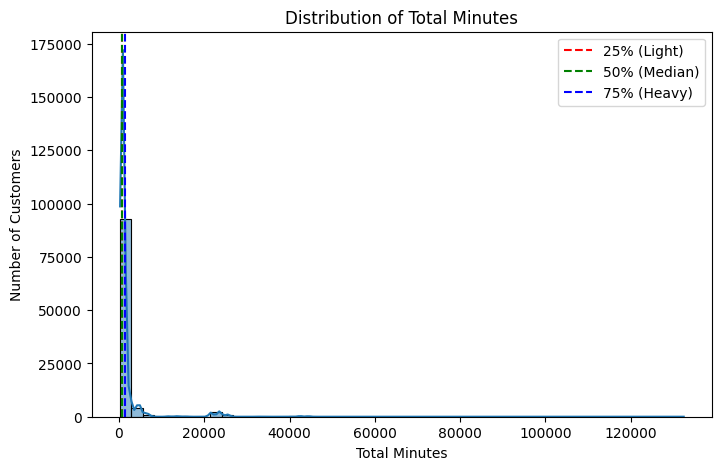

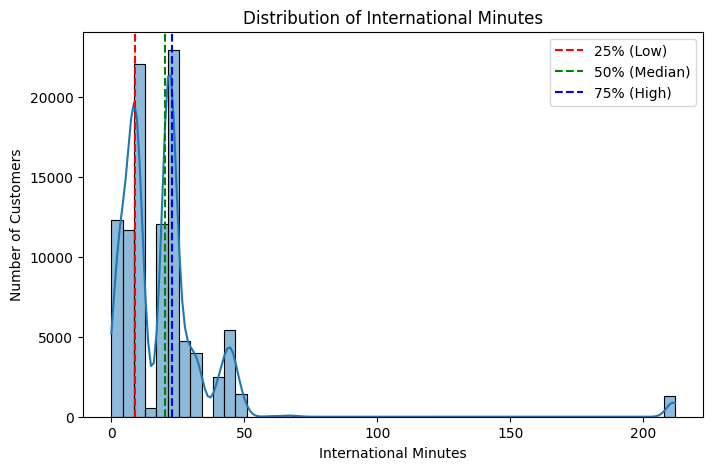

In [28]:
# visualize customer distribution

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Total Minutes
plt.figure(figsize=(8,5))
sns.histplot(customer_usage["Total_Mins"], bins=50, kde=True)
plt.axvline(695, color="red", linestyle="--", label="25% (Light)")
plt.axvline(786, color="green", linestyle="--", label="50% (Median)")
plt.axvline(1340, color="blue", linestyle="--", label="75% (Heavy)")
plt.title("Distribution of Total Minutes")
plt.xlabel("Total Minutes")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()

# Histogram for International Minutes
plt.figure(figsize=(8,5))
sns.histplot(customer_usage["Intl Mins"], bins=50, kde=True)
plt.axvline(8.8, color="red", linestyle="--", label="25% (Low)")
plt.axvline(20.2, color="green", linestyle="--", label="50% (Median)")
plt.axvline(22.8, color="blue", linestyle="--", label="75% (High)")
plt.title("Distribution of International Minutes")
plt.xlabel("International Minutes")
plt.ylabel("Number of Customers")
plt.legend()
plt.show()


In [30]:
# MAIN CODE FOR RECOMMENDATION

# Define tariff plans
plans = [
    {"name": "Basic Saver", "local_range": (0, 700), "intl_range": (0, 9), "price": 199},
    {"name": "Basic Global", "local_range": (0, 700), "intl_range": (23, float("inf")), "price": 299},
    {"name": "Standard", "local_range": (700, 1300), "intl_range": (0, 9), "price": 399},
    {"name": "Standard Intl", "local_range": (700, 1300), "intl_range": (9, 23), "price": 499},
    {"name": "Unlimited Local", "local_range": (1300, float("inf")), "intl_range": (0, 9), "price": 699},
    {"name": "Global Plus", "local_range": (1300, float("inf")), "intl_range": (23, float("inf")), "price": 899}
]

# Function to match customer to plan(s)
def recommend_plan(local_mins, intl_mins):
    recommendations = []
    for plan in plans:
        local_low, local_high = plan["local_range"]
        intl_low, intl_high = plan["intl_range"]

        # Check if customer fits in this plan
        if local_low <= local_mins <= local_high and intl_low <= intl_mins <= intl_high:
            recommendations.append(plan["name"])

    # If no exact match, fallback to closest plan by usage
    if not recommendations:
        closest_plan = min(plans, key=lambda p: abs(local_mins - sum(p["local_range"])/2) + abs(intl_mins - sum(p["intl_range"])/2))
        recommendations.append(closest_plan["name"])

    return recommendations

# Apply to dataset
customer_usage["Recommended_Plans"] = customer_usage.apply(
    lambda row: recommend_plan(row["Total_Mins"], row["Intl Mins"]), axis=1
)

# Preview result
customer_usage[["Phone Number", "Total_Mins", "Intl Mins", "Recommended_Plans"]].head(10)


/tmp/ipython-input-1131781516.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_usage["Recommended_Plans"] = customer_usage.apply(


,Phone Number,Total_Mins,Intl Mins,Recommended_Plans
0,382-4657,707.2,10.0,[Standard Intl]
1,371-7191,611.5,13.7,[Basic Saver]
2,358-1921,527.2,12.2,[Basic Saver]
3,375-9999,558.2,6.6,[Basic Saver]
4,330-6626,501.9,10.1,[Basic Saver]
5,391-8027,647.9,6.3,[Basic Saver]
6,355-9993,779.3,7.5,[Standard]
7,329-9001,471.9,7.1,[Basic Saver]
8,335-4719,751.9,8.7,[Standard]
9,330-8173,807.0,11.2,[Standard Intl]


**FINAL CODE**

In [33]:
# RECOMMEDNING 3 PLANS # Function to recommend top 3 closest plans


def recommend_top3_plans(local_mins, intl_mins):
    # Compute distance of customer usage from each plan's midpoint
    distances = []
    for plan in plans:
        local_mid = (plan["local_range"][0] + plan["local_range"][1]) / 2 if plan["local_range"][1] != float("inf") else plan["local_range"][0] + 500
        intl_mid = (plan["intl_range"][0] + plan["intl_range"][1]) / 2 if plan["intl_range"][1] != float("inf") else plan["intl_range"][0] + 10
        distance = abs(local_mins - local_mid) + abs(intl_mins - intl_mid)
        distances.append((plan["name"], plan["price"], distance))

    # Sort by distance (closer usage = better plan)
    distances = sorted(distances, key=lambda x: x[2])

    # Return top 3 plan names with prices
    top3 = [(name, price) for name, price, _ in distances[:3]]
    return top3

# Apply to dataset
customer_usage["Top3_Plans"] = customer_usage.apply(
    lambda row: recommend_top3_plans(row["Total_Mins"], row["Intl Mins"]), axis=1
)

# Preview result
customer_usage[["Phone Number", "Total_Mins", "Intl Mins", "Top3_Plans"]].head(10)


/tmp/ipython-input-3183315808.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_usage["Top3_Plans"] = customer_usage.apply(


,Phone Number,Total_Mins,Intl Mins,Top3_Plans
0,382-4657,707.2,10.0,"[(Standard, 399), (Standard Intl, 499), (Basic..."
1,371-7191,611.5,13.7,"[(Basic Saver, 199), (Basic Global, 299), (Sta..."
2,358-1921,527.2,12.2,"[(Basic Saver, 199), (Basic Global, 299), (Sta..."
3,375-9999,558.2,6.6,"[(Basic Saver, 199), (Basic Global, 299), (Sta..."
4,330-6626,501.9,10.1,"[(Basic Saver, 199), (Basic Global, 299), (Sta..."
5,391-8027,647.9,6.3,"[(Basic Saver, 199), (Basic Global, 299), (Sta..."
6,355-9993,779.3,7.5,"[(Standard, 399), (Standard Intl, 499), (Basic..."
7,329-9001,471.9,7.1,"[(Basic Saver, 199), (Basic Global, 299), (Sta..."
8,335-4719,751.9,8.7,"[(Standard, 399), (Standard Intl, 499), (Basic..."
9,330-8173,807.0,11.2,"[(Standard Intl, 499), (Standard, 399), (Basic..."


In [36]:
# how to count how many customers fall into each recommended plan (insights/summary)

# Case 1: Count by First Recommended Plan
from collections import Counter

# Take only the 1st plan from Top3 for each customer
first_choice_counts = customer_usage["Top3_Plans"].apply(lambda x: x[0][0])  # x[0][0] = first plan's name
plan_distribution = Counter(first_choice_counts)

print("Customer Distribution by First Choice Plan:")
for plan, count in plan_distribution.items():
    print(f"{plan}: {count}")


Customer Distribution by First Choice Plan:
Standard: 28923
Basic Saver: 9330
Standard Intl: 36716
Basic Global: 7692
Global Plus: 10469
Unlimited Local: 8044


In [37]:
# Case 2: Count by All Top 3 Plans

# Flatten all Top 3 plan names into one list
all_recommendations = [plan[0] for sublist in customer_usage["Top3_Plans"] for plan in sublist]

plan_popularity = Counter(all_recommendations)

print("Plan Popularity (Appears in Top 3):")
for plan, count in plan_popularity.items():
    print(f"{plan}: {count}")


Plan Popularity (Appears in Top 3):
Standard: 79903
Standard Intl: 88865
Basic Saver: 41720
Basic Global: 46075
Global Plus: 23908
Unlimited Local: 23051


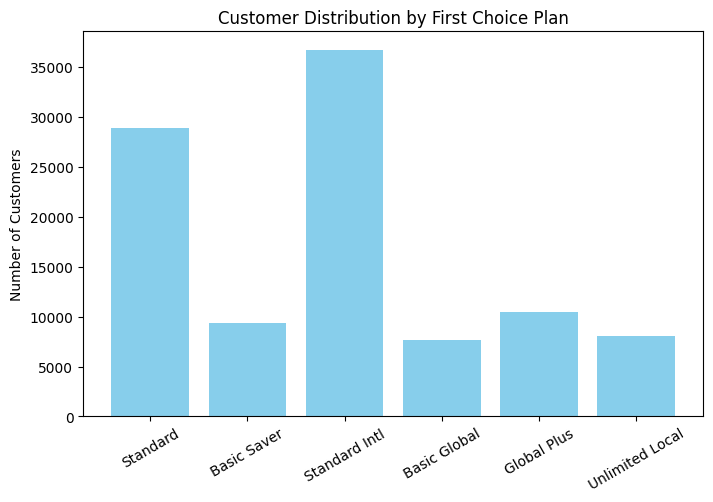

In [38]:
import matplotlib.pyplot as plt

# Bar chart for first-choice distribution
plt.figure(figsize=(8,5))
plt.bar(plan_distribution.keys(), plan_distribution.values(), color="skyblue")
plt.title("Customer Distribution by First Choice Plan")
plt.ylabel("Number of Customers")
plt.xticks(rotation=30)
plt.show()
